## 📊 Stock Market Analysis & Prediction

### Technology Stocks: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Tesla (TSLA), Meta (META)

---

### **Introduction**

This Jupyter notebook provides a comprehensive analysis of the stock market performance of five major technology companies: Apple (AAPL), Microsoft (MSFT), Amazon (AMZN), Tesla (TSLA), and Meta (META). We will explore their historical stock price data, visualize trends, and develop a Long Short-Term Memory (LSTM) neural network model to predict the closing price of Apple (AAPL).

---

### **Objectives**

1. **Data Acquisition and Preprocessing:**
   - Download historical stock price data from a reliable source (e.g., Yahoo Finance using the `yfinance` library).
   - Clean and preprocess the data by handling missing values and ensuring consistency.
   - Visualize the stock price trends for each company.

2. **Exploratory Data Analysis (EDA):**
   - Calculate and visualize key statistical measures such as moving averages and volatility.
   - Examine correlations between the stock prices of different companies.
   - Analyze the impact of trading volume on stock prices.

3. **Feature Engineering:**
   - Create relevant features for the LSTM model, including lagged closing prices, moving averages, and technical indicators.
   - Scale the data using techniques such as Min-Max scaling or Standardization.

4. **LSTM Model Development:**
   - Build an LSTM neural network model to predict the closing price of Apple (AAPL).
   - Split the data into training and testing sets.
   - Train the LSTM model on the training data.
   - Evaluate the model's performance using metrics like Mean Squared Error (MSE) and Root Mean Squared Error (RMSE).

5. **Visualization and Interpretation:**
   - Visualize the predicted vs. actual closing prices.
   - Analyze the model's performance and identify potential areas for improvement.
   - Discuss the implications of the findings and potential applications of the model.

---

### **Libraries Used**

- **yfinance**: For downloading historical stock data.
- **pandas**: For data manipulation and analysis.
- **numpy**: For numerical computations.
- **matplotlib.pyplot**: For data visualization.
- **seaborn**: For enhanced data visualization.
- **scikit-learn (sklearn)**: For data preprocessing and model evaluation.
- **tensorflow/keras**: For building and training the LSTM model.

---

### **Data Source**

Historical stock price data will be downloaded using the `yfinance` library, which provides access to Yahoo Finance data.

---

### **Methodology**

1. **Data Collection**: Stock data for AAPL, MSFT, AMZN, TSLA, and META will be fetched over a specified time period.
2. **Data Cleaning**: Missing values will be handled using appropriate methods (e.g., imputation or removal).
3. **Data Visualization**: Line plots and other charts will be used to visualize stock price trends and trading volumes.
4. **Feature Engineering**: Lagged closing prices, moving averages, and other technical indicators will be calculated.
5. **Model Building**: An LSTM model will be constructed using Keras, with appropriate layers and hyperparameters.
6. **Model Training**: The model will be trained on the training data, and its performance will be monitored.
7. **Model Evaluation**: The model's predictions will be compared with the actual closing prices on the testing data.
8. **Results and Discussion**: The findings will be summarized and visualised using Streamlit Webapp.

---

### **Expected Outcomes**

- A clear understanding of the historical stock price trends for major tech companies.
- A predictive model for Apple's closing price using LSTM.
- Insights into the factors influencing stock prices.
- Visualizations and analysis that can be used for further research and investment decisions.


## 1. Import Libraries

In [15]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import streamlit as st
import datetime


##  2. Fetch Stock Data

In [28]:
stocks = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'META']

# Calculate the start date for the last 365 days
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

# Download the stock data for the last 365 days
data = yf.download(stocks, start=start_date, end=end_date, auto_adjust=False)

# Display the first few rows of the Adjusted Close prices
data['Adj Close'].head()

[*********************100%***********************]  5 of 5 completed


Ticker,AAPL,AMZN,META,MSFT,TSLA
Date,,,,,
2024-03-15,171.808731,174.419998,482.340393,413.264893,163.570007
2024-03-18,172.903580,174.479996,495.173553,414.158051,173.800003
2024-03-19,175.252487,175.899994,494.436218,418.217072,171.320007
2024-03-20,177.830307,178.149994,503.682495,422.008118,175.660004
2024-03-21,170.564621,178.149994,505.914337,426.116760,172.820007


##  2.1 Checking for Missing data and handling if any:

In [29]:
data['Adj Close'] = data['Adj Close'].fillna(method='ffill')  # forward fill

data.dropna(inplace=True)
data = data.loc[~data.index.duplicated(keep='first')]
z_score_threshold = 3
z_scores = np.abs((data['Adj Close'] - data['Adj Close'].mean()) / data['Adj Close'].std())
data = data[z_scores < z_score_threshold]
data_weekly = data['Adj Close'].resample('W').last() 
print(data.head())


Price        Adj Close                                                  \
Ticker            AAPL        AMZN        META        MSFT        TSLA   
Date                                                                     
2024-03-15  171.808731  174.419998  482.340393  413.264893  163.570007   
2024-03-18  172.903580  174.479996  495.173553  414.158051  173.800003   
2024-03-19  175.252487  175.899994  494.436218  418.217072  171.320007   
2024-03-20  177.830307  178.149994  503.682495  422.008118  175.660004   
2024-03-21  170.564621  178.149994  505.914337  426.116760  172.820007   

Price            Close                                                  ...  \
Ticker            AAPL        AMZN        META        MSFT        TSLA  ...   
Date                                                                    ...   
2024-03-15  172.619995  174.419998  484.100006  416.420013  163.570007  ...   
2024-03-18  173.720001  174.479996  496.980011  417.320007  173.800003  ...   
2024-03-19  

C:\Users\ajaia\AppData\Local\Temp\ipykernel_10304\1228859928.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data['Adj Close'] = data['Adj Close'].fillna(method='ffill')  # forward fill


## 3. Stock Price Trends Over Time

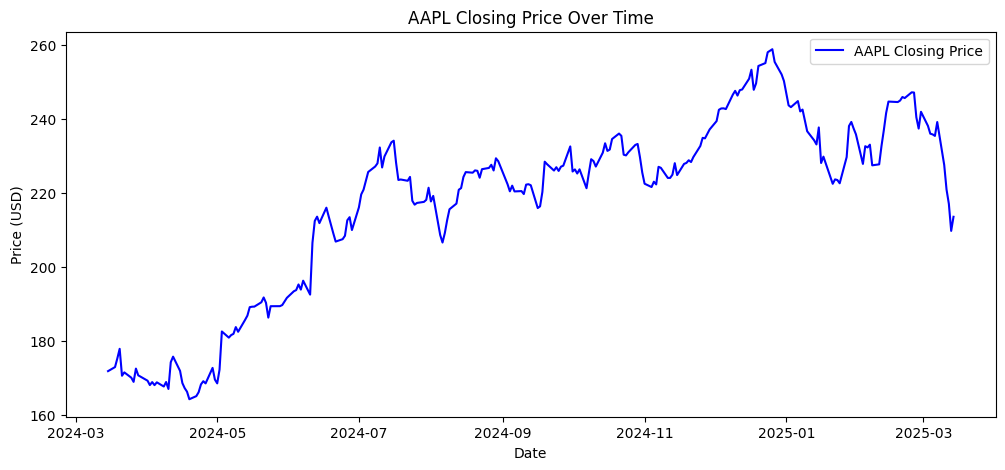

<Figure size 1200x600 with 0 Axes>

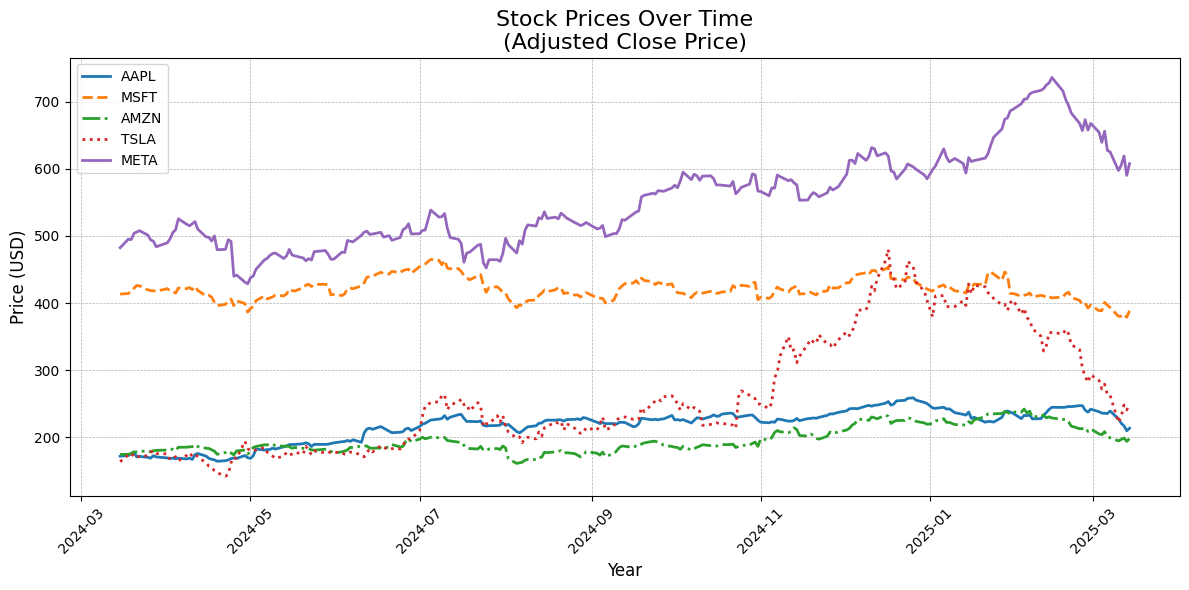

In [30]:
import matplotlib.pyplot as plt

# Enhance the plot
plt.figure(figsize=(12,6))

# Plot each stock with distinct colors and line styles
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
line_styles = ['-', '--', '-.', ':', '-']
for i, stock in enumerate(stocks):
    plt.plot(data['Adj Close'][stock], label=stock, color=colors[i], linestyle=line_styles[i], linewidth=2)

# Add a title with more detail
plt.title('Stock Prices Over Time\n(Adjusted Close Price)', fontsize=16)

# Format x-axis labels for better readability (if date range is large)
plt.xticks(rotation=45)

# Add labels to axes
plt.xlabel('Year', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Add a legend with better formatting
plt.legend(loc='upper left', fontsize=10)

# Add gridlines to the plot for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

# Optionally, highlight a specific date or event with vertical lines (example)
# plt.axvline(x='2020-03-01', color='black', linestyle=':', label='COVID-19 Impact')

# Show the plot
plt.tight_layout()  # To ensure everything fits nicely
plt.show()


## 4. Daily Returns

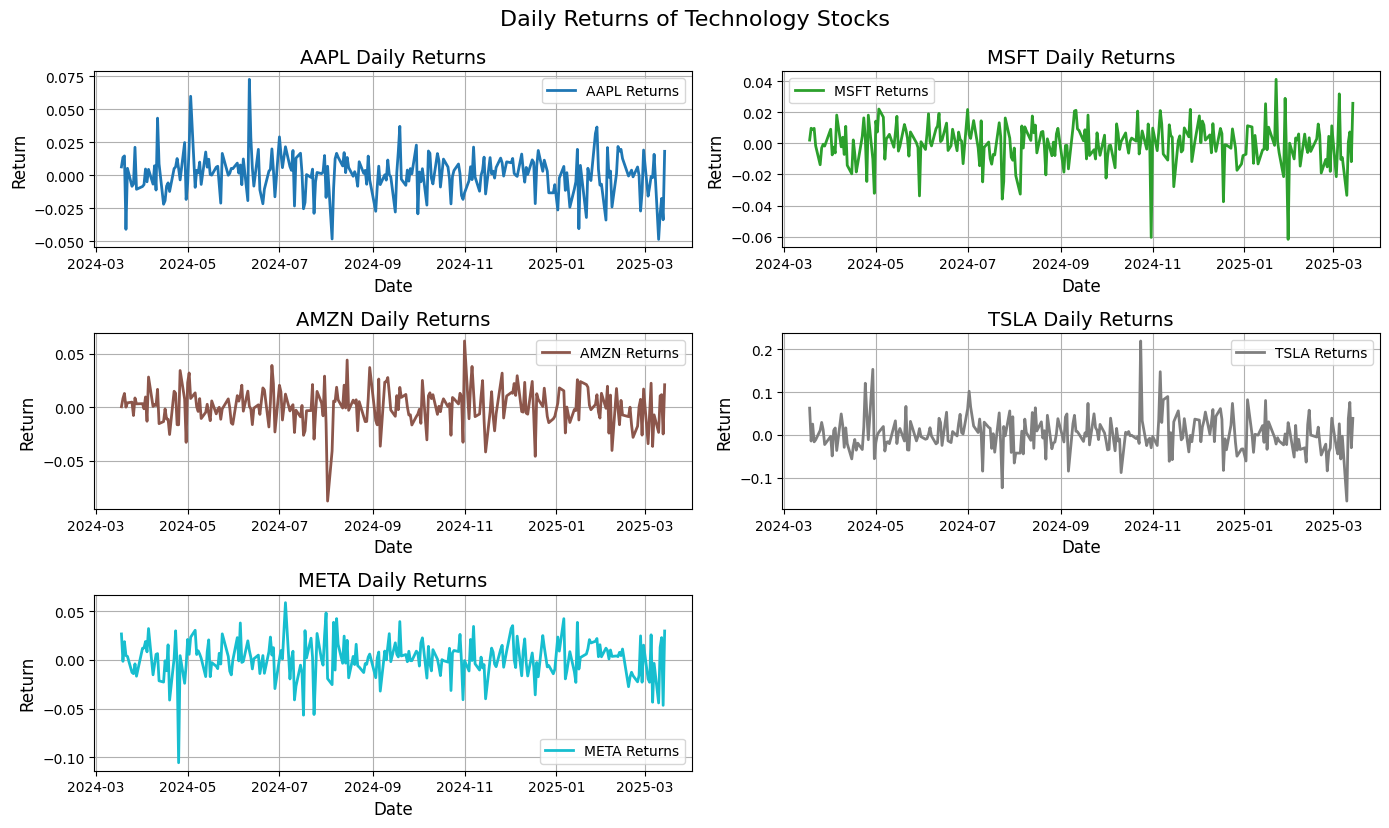

In [31]:
returns = data['Adj Close'].pct_change()

# Set up the figure with multiple subplots
n_stocks = len(stocks)
n_cols = 2  # Number of columns of subplots
n_rows = (n_stocks + 1) // n_cols  # Calculate rows needed for subplots

# Set up color palette manually
colors = plt.cm.tab10(np.linspace(0, 1, len(stocks)))

# Plot daily returns in subplots
plt.figure(figsize=(14, 8))

for i, stock in enumerate(stocks):
    plt.subplot(n_rows, n_cols, i + 1)  # Create a subplot for each stock
    plt.plot(returns[stock], label=f'{stock} Returns', color=colors[i], linewidth=2)
    plt.title(f'{stock} Daily Returns', fontsize=14)
    plt.xlabel('Date', fontsize=12)
    plt.ylabel('Return', fontsize=12)
    plt.grid(True)  # Add a grid for better readability
    plt.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Add a global title
plt.suptitle('Daily Returns of Technology Stocks', fontsize=16, y=1.03)

# Show the plot
plt.show()

## 5. Moving Averages

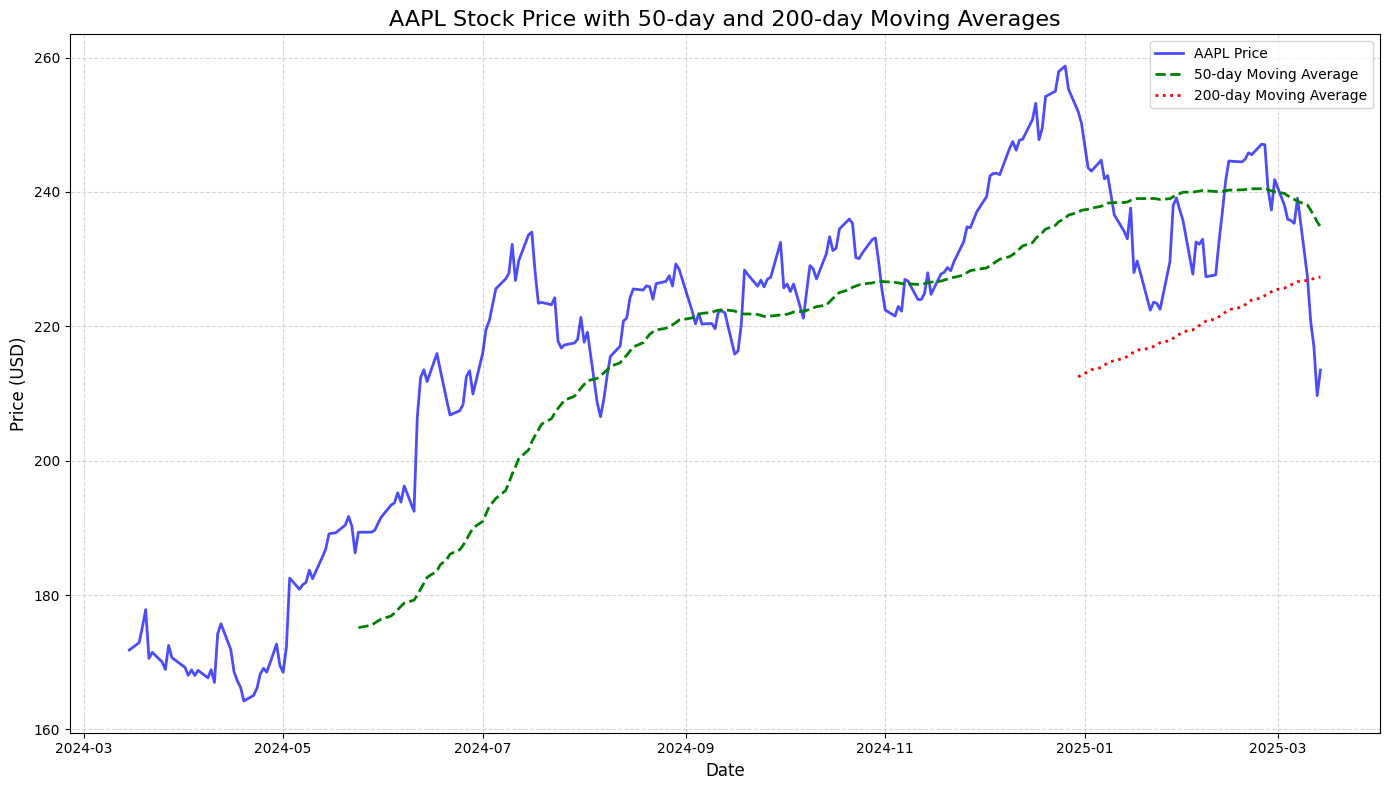

In [33]:
# Calculate the 50-day and 200-day moving averages
data['50MA'] = data['Adj Close']['AAPL'].rolling(window=50).mean()
data['200MA'] = data['Adj Close']['AAPL'].rolling(window=200).mean()

# Plotting
plt.figure(figsize=(14, 8))

# Plot the stock price (AAPL Adjusted Close) and moving averages
plt.plot(data['Adj Close']['AAPL'], label='AAPL Price', alpha=0.7, color='blue', linewidth=2)
plt.plot(data['50MA'], label='50-day Moving Average', linestyle='--', color='green', linewidth=2)
plt.plot(data['200MA'], label='200-day Moving Average', linestyle=':', color='red', linewidth=2)

# Title and labels
plt.title('AAPL Stock Price with 50-day and 200-day Moving Averages', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)

# Adding gridlines for better readability
plt.grid(True, linestyle='--', alpha=0.5)

# Displaying the legend
plt.legend()

# Show plot
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

## 6. Correlation Analysis Between Stocks

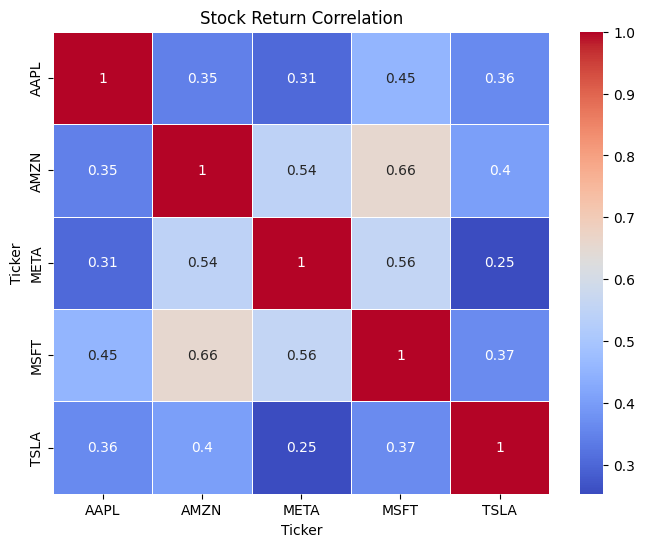

In [34]:
# Compute correlation matrix
correlation_matrix = returns.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Stock Return Correlation')
plt.show()

## 7. Risk Analysis (Value at Risk - VaR)

In [35]:
# Compute Value at Risk (VaR) at 95% confidence level
var_95 = returns['AAPL'].quantile(0.05)
print(f'95% Value at Risk for AAPL: {var_95:.4f}')

95% Value at Risk for AAPL: -0.0267


## 8. Predicting AAPL Closing Price Using LSTM

In [36]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Assuming you have a dataframe `data` with stock prices
# Let's say we're predicting 'Adj Close' prices

# Step 1: Prepare the data (use 60 days as the timesteps for prediction)
timesteps = 60

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Adj Close'].values.reshape(-1, 1))

# Step 2: Create X and y for LSTM model
X = []
y = []

for i in range(timesteps, len(scaled_data)):
    X.append(scaled_data[i-timesteps:i, 0])  # 60 previous days
    y.append(scaled_data[i, 0])  # Next day's price

X, y = np.array(X), np.array(y)

# Step 3: Reshape X to be compatible with LSTM input shape
X = X.reshape(X.shape[0], X.shape[1], 1)  # Shape: (samples, timesteps, features)

# Step 4: Build the LSTM model
model = Sequential([
    LSTM(50, return_sequences=True, input_shape=(X.shape[1], 1)),
    LSTM(50, return_sequences=False),
    Dense(25),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 5: Train the model (if you have sufficient data)
model.fit(X, y, batch_size=32, epochs=10)


Epoch 1/10


C:\Users\ajaia\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 29ms/step - loss: 0.0756
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - loss: 0.0630
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0536
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0467
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0174
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0110
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0117
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0104
Epoch 9/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0112
Epoch 10/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - loss: 0.0099


## Calculate Portfolio returns and risk:

In [24]:
import numpy as np

# Generate random weights for stocks
weights = np.random.random(len(stocks))
weights /= np.sum(weights)  # Normalize

# Calculate portfolio return & risk
expected_return = np.sum(returns.mean() * weights * 252)  # Annualized return
expected_volatility = np.sqrt(np.dot(weights.T, np.dot(returns.cov() * 252, weights)))  # Annualized volatility

print(f"Expected Annual Return: {expected_return:.2%}")
print(f"Expected Annual Volatility (Risk): {expected_volatility:.2%}")


Expected Annual Return: 28.83%
Expected Annual Volatility (Risk): 28.85%


## LSTM model using Streamlit Webapp


In [25]:

# 🎯 Streamlit App Title
st.title("📈 Live Stock Price Prediction using LSTM")
st.write("Select a stock and predict the next closing price using an LSTM model.")

# 🔹 User Input: Select a Stock Ticker
stocks = ['AAPL', 'MSFT', 'AMZN', 'TSLA', 'META', 'GOOGL']
ticker = st.selectbox("Select a stock:", stocks)

# 🕒 Calculate Date Range: Last 365 days
end_date = datetime.datetime.today()
start_date = end_date - datetime.timedelta(days=365)

# 🏦 Fetch Historical Data for the last 365 days
st.write(f"Fetching data for **{ticker}**...")
data = yf.download(ticker, start=start_date, end=end_date)

# 🔄 Preprocessing
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1, 1))

# 📊 Create Sequences for LSTM
def create_sequences(data, seq_length=60):
    X, y = [], []
    # Ensure there is enough data to create sequences
    if len(data) <= seq_length:
        return np.array([]), np.array([])  # Return empty arrays if not enough data
    
    for i in range(seq_length, len(data)):
        X.append(data[i - seq_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

seq_length = 60
X_train, y_train = create_sequences(scaled_data, seq_length)

# Check if data is not empty before reshaping
if X_train.size > 0:
    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))  # Reshape for LSTM
else:
    st.warning(f"Not enough data to create sequences. You need at least {seq_length} data points.")
    X_train, y_train = np.array([]), np.array([])

# 🔥 Build LSTM Model (only if data is available)
if X_train.size > 0:
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(50, return_sequences=False),
        Dense(25),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')

    # 🚀 Train Model
    st.write("Training the LSTM model... This may take a few minutes.")
    model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
    st.success("✅ Model training complete!")
else:
    st.warning("Model training not completed due to insufficient data.")

# 📡 Live Stock Price Prediction
def predict_next_close(ticker):
    # Fetch last 365 days of data for live prediction
    live_data = yf.download(ticker, period='365d', interval='1d')['Close'].values
    if len(live_data) < 365:
        return None
    
    # Scale and reshape the data
    live_data_scaled = scaler.transform(live_data.reshape(-1, 1))
    live_input = np.array([live_data_scaled])
    live_input = np.reshape(live_input, (live_input.shape[0], live_input.shape[1], 1))

    # Predict the next closing price
    predicted_price = model.predict(live_input)
    return scaler.inverse_transform(predicted_price)[0][0]

# 🧑‍💻 Predict Button
if st.button("🔮 Predict Next Closing Price"):
    if X_train.size > 0:
        predicted_price = predict_next_close(ticker)
        if predicted_price:
            st.success(f"📊 Predicted Next Closing Price for **{ticker}**: **${predicted_price:.2f}**")
        else:
            st.warning("Not enough recent data for prediction.")
    else:
        st.warning("Model not trained due to insufficient data.")

# 📈 Display Stock Price Chart
st.subheader(f"📉 {ticker} Stock Price History")
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(data.index, data['Close'], label=f'{ticker} Closing Price', color='blue')
ax.set_xlabel("Date")
ax.set_ylabel("Price (USD)")
ax.set_title(f"{ticker} Closing Price Over Time")
ax.legend()
st.pyplot(fig)


2025-03-15 15:30:22.233 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 15:30:22.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 15:30:22.237 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 15:30:22.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 15:30:22.238 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 15:30:22.239 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 15:30:22.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-15 15:30:22.242 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()